In [1]:
# Import the tensorflow library, and reference it as `tf`
import tensorflow as tf

# Build our graph nodes, starting from the inputs
a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

# Open up a TensorFlow Session
sess = tf.Session()

# Execute our output node, using our Session
output = sess.run(e)

# Open a TensorFlow SummaryWriter to write our graph to disk
writer = tf.summary.FileWriter('../graph/my_graph', sess.graph)

# Close our SummaryWriter and Session objects
writer.close()
sess.close()

# To start TensorBoard after running this file, execute the following command:
# $ tensorboard --logdir='./my_graph'

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


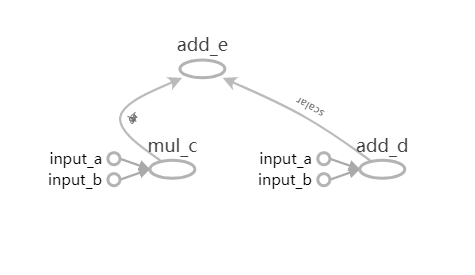

In [11]:
from IPython.display import Image

Image('img/png.png', width=400, height=80)

In [ ]:
# Import the tensorflow library, and reference it as `tf`
import tensorflow as tf

In [ ]:
# Build our graph nodes, starting from the inputs
a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.mul(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

In [ ]:
# Open up a TensorFlow Session
sess = tf.Session()

In [ ]:
# Execute our output node, using our Session
output = sess.run(e)

In [ ]:
# Open a TensorFlow SummaryWriter to write our graph to disk
writer = tf.train.SummaryWriter('./my_graph', sess.graph)

In [ ]:
# Close our SummaryWriter and Session objects
writer.close()
sess.close()

To start TensorBoard after running this file, execute the following command:

```
$ tensorboard --logdir='./my_graph'
```